In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
#upload dataset
insurance = pd.read_csv(r'/content/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


In [ ]:
#overview of column datatypes
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [3]:
#remove duplicates
insurance.drop_duplicates(inplace=True)

In [ ]:
#check through for missing values
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#observe the values for all categorical columns
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
insurance.sex.value_counts()

,count
sex,
male,675
female,662


In [16]:
insurance['charges'] = insurance['charges'].round(2)

[Text(0, 0, '12346.94'),
 Text(0, 0, '14735.41'),
 Text(0, 0, '12450.84'),
 Text(0, 0, '13406.38')]

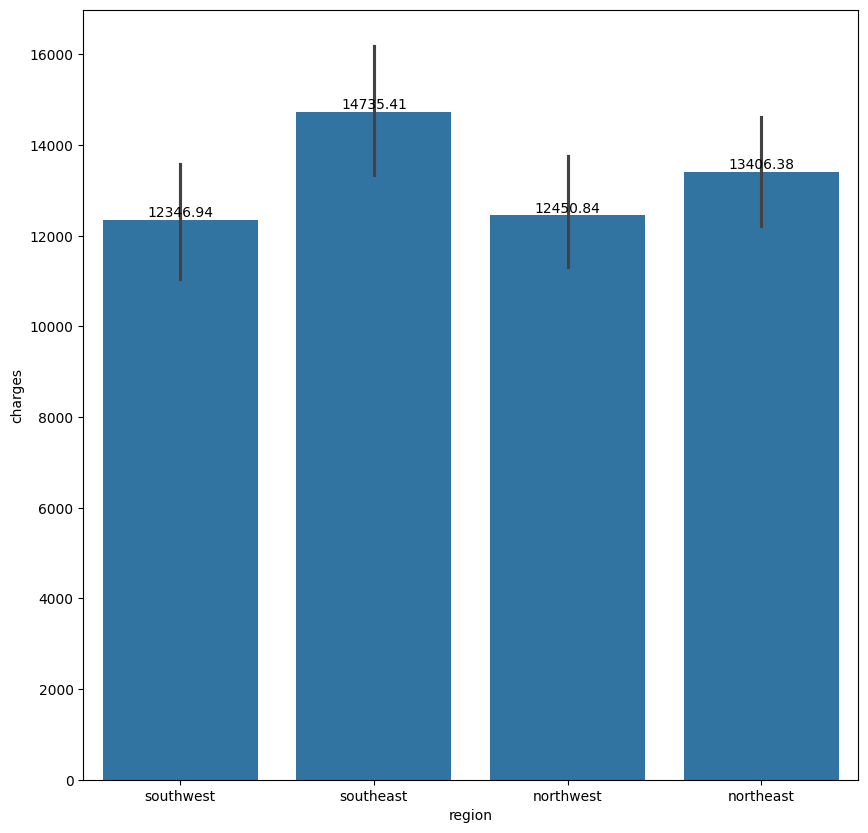

In [ ]:
#understand how insurance charges are spread across regions. The variations aren't extremely large, but the south east region has incurred the most costs
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.barplot(x = 'region', y ='charges', data = insurance)
ax.bar_label(ax.containers[0], fmt="%.2f")


Text(0, 0.5, 'charges')

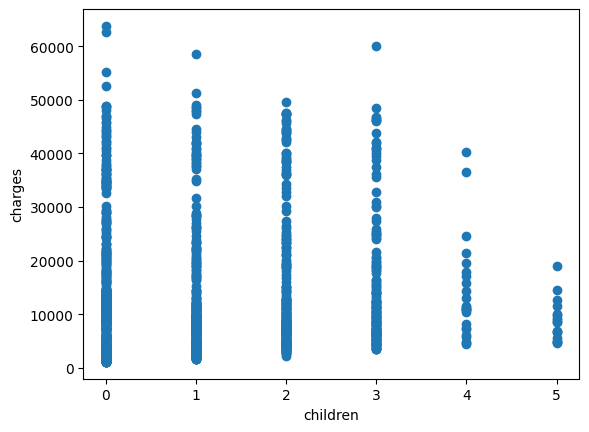

In [17]:
#%matplotlib inline
plt.scatter(insurance.children, insurance.charges)
plt.xlabel('children')
plt.ylabel( 'charges')

Text(0, 0.5, 'charges')

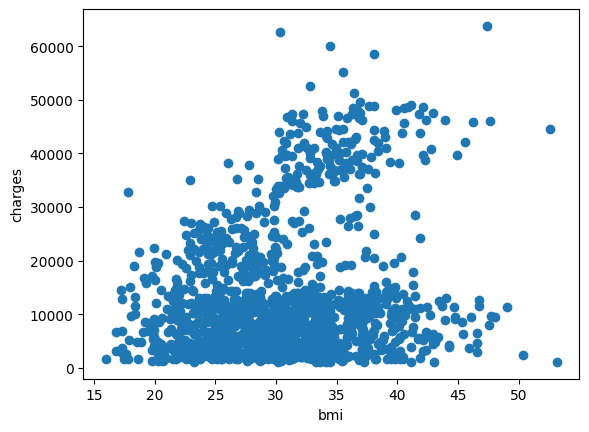

In [20]:
plt.scatter(insurance.bmi, insurance.charges)
plt.xlabel('bmi')
plt.ylabel( 'charges')

#there's no apparent relationship between bmi and insurance charge

In [7]:
#people with more kids tend not to have insurance. That's understandable; they have more priorities

<Axes: xlabel='sex'>

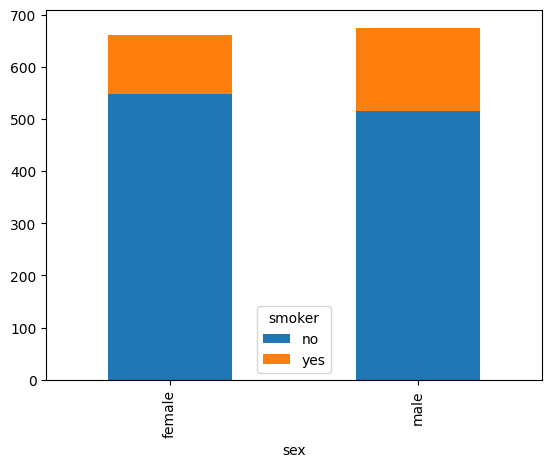

In [15]:
contingency_table = pd.crosstab(index = insurance['sex'], columns = insurance['smoker'])
contingency_table.plot(kind='bar', stacked=True)

In [ ]:
#most people don't smoke and the difference between males and females who smoke isn't so much but there are more male smokers than females

In [ ]:
plt.scatter(insurance.age, insurance.charges)
plt.xlabel('Age')
plt.ylabel( 'charges')

In [22]:
#encode categorical variables into binary values for the model to work with them.
insurance_encoded = pd.get_dummies(insurance, columns = ['sex', 'region', 'smoker'], drop_first=True)

In [ ]:
insurance_encoded.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92,False,False,False,True,True
1,18,33.770,1,1725.55,True,False,True,False,False
2,28,33.000,3,4449.46,True,False,True,False,False
3,33,22.705,0,21984.47,True,True,False,False,False
4,32,28.880,0,3866.86,True,True,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [24]:
#define training and test data
X = insurance_encoded.drop(columns = 'charges')
Y = insurance_encoded['charges']

In [25]:
#split data accordingly
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state= 40)

In [26]:
# The reg. fit method is used to train the data. Here, the training set is passed in as the parameters
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [27]:
#this attempts to predict the 'charges' following all the predictors (age, sex, bmi, etc)
pred = reg.predict(X_test)

In [28]:
#the root mean square error is a metric used to test the accuracy of the model. the rmse of 5948.177... suggests that this model can be improved. i.e they deviate from the average price by +- 5948
rmse = root_mean_squared_error(Y_test, pred)
print(rmse)

5948.177477171246


In [ ]:
# I'm confirming the mean and standard deviation of the charges to see how close the rmse might be. A linear regression doesn't capture the patterns in this data well enough
Y_train.mean()

13324.818447146865

In [29]:
Y_train.std()

11969.946994376991

In [ ]:
# In conclusion, a linear regression wouldn't do justice in capturing unique patterns in this data. Having examined the relationship between variables, I don't think feature engineering will do much in reducing the rmse score